In [1]:
import pandas as pd

In [2]:
!pip install pyarrow

In [3]:
data1 = pd.read_csv('emprestimos-20101.csv')
data2 = pd.read_csv('emprestimos-20102.csv')
data3 = pd.read_csv('emprestimos-20111.csv')
data4 = pd.read_csv('emprestimos-20112.csv')
data18 = pd.read_csv('emprestimos-20121.csv')
data5 = pd.read_csv('emprestimos-20122.csv')
data6 = pd.read_csv('emprestimos-20131.csv')
data7 = pd.read_csv('emprestimos-20132.csv')
data8 = pd.read_csv('emprestimos-20141.csv')
data9 = pd.read_csv('emprestimos-20142.csv')
data10 = pd.read_csv('emprestimos-20151.csv')
data11 = pd.read_csv('emprestimos-20152.csv')
data19 = pd.read_csv('emprestimos-20161.csv')
data12 = pd.read_csv('emprestimos-20162.csv')
data13 = pd.read_csv('emprestimos-20171.csv')
data14 = pd.read_csv('emprestimos-20172.csv')
data15 = pd.read_csv('emprestimos-20181.csv')
data20 = pd.read_csv('emprestimos-20182.csv')
data16 = pd.read_csv('emprestimos-20191.csv')
data17 = pd.read_csv('emprestimos-20192.csv')
data21 = pd.read_csv('emprestimos-20201.csv')
exemplares = pd.read_parquet('dados_exemplares.parquet')

In [4]:
# concatenando todos os dataframes

df = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21], axis=0)


In [5]:
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [6]:
df.shape

(2258018, 7)

In [7]:
df_total = pd.merge(df, exemplares, on='codigo_barras')

In [8]:
df_total.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [9]:
df_total.shape

(2072558, 13)

In [10]:
# verificando a quantidade de valores ausentes 

valores_ausentes = pd.DataFrame(df_total.isnull().sum().sort_values(ascending=False))
valores_ausentes['porcentagem'] = df_total.isnull().sum().sort_values(ascending=False) / df_total.shape[0] *100.
print('Colunas com valores ausentes: ', valores_ausentes[valores_ausentes[0] > 0 ].shape[0])
valores_ausentes = valores_ausentes[valores_ausentes[0] > 0 ]
valores_ausentes

Colunas com valores ausentes:  3


,0,porcentagem
data_renovacao,1162088,56.070228
data_devolucao,6178,0.298086
matricula_ou_siape,2893,0.139586


In [11]:
# substituindo valores ausentes por "NA" nas datas de renovações e removendo as linhas com valores ausentes nos demais casos

df_total.dropna(subset=['matricula_ou_siape', 'data_devolucao'], inplace=True)
df_total['data_renovacao'].fillna("NA", inplace=True)

In [12]:
print(df_total.isnull().values.any())

False


In [13]:
df_total.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NA,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709684,L095049,NA,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
3,709685,L167050,NA,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,709685,L167050,NA,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [14]:
# removendo colunas desnecessárias

df_total = df_total.drop('registro_sistema', axis=1)

In [15]:
# verificando os formatos

df_total.dtypes

id_emprestimo             int64
codigo_barras            object
data_renovacao           object
data_emprestimo          object
data_devolucao           object
matricula_ou_siape      float64
tipo_vinculo_usuario     object
id_exemplar               int64
colecao                  object
biblioteca               object
status_material          object
localizacao               int64
dtype: object

In [16]:
# convertendo o tipo da variável 

df_total['matricula_ou_siape'] = df_total['matricula_ou_siape'].astype(str)

In [17]:
# criando uma nova coluna com o tempo de cada empréstimo em dias

# Convertendo as colunas de datas para o tipo datetime
df_total['data_emprestimo'] = pd.to_datetime(df_total['data_emprestimo'])
df_total['data_devolucao'] = pd.to_datetime(df_total['data_devolucao'])

# Calculando a diferença entre as colunas e extraindo o número de dias
df_total['duracao_do_emprestimo'] = (df_total['data_devolucao'] - df_total['data_emprestimo']).dt.days

In [18]:
# criando uma nova coluna com a categoria de cada livro

# Definindo o dicionário de mapeamento
mapa_cdu = {
    range(0, 100): 'generalidades_ciencia_conhecimento',
    range(100, 200): 'filosofia_psicologia',
    range(200, 300): 'religiao',
    range(300, 400): 'ciencias_sociais',
    range(500, 600): 'matematica_ciencias_naturais',
    range(600, 700): 'ciencias_aplicadas',
    range(700, 800): 'belas_artes',
    range(800, 900): 'linguagem_lingua_linguistica',
    range(900, 1000): 'geografia_biografia_historia'
}

# Criando a nova coluna com as classes gerais correspondentes
df_total['classe_cdu'] = df_total['localizacao'].apply(lambda x: next((v for k, v in mapa_cdu.items() if x in k), 'Classe vaga. Provisoriamente não ocupada'))

In [19]:
#excluindo duplicatas

df_total = df_total.drop_duplicates()

In [20]:
if df_total.duplicated().any():
    print("Existem duplicatas no DataFrame!")
else:
    print("Não há duplicatas no DataFrame.")

Não há duplicatas no DataFrame.


In [21]:
df_total.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,duracao_do_emprestimo,classe_cdu
0,709684,L095049,NA,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,1,ciencias_aplicadas
2,726965,L095049,2010/03/31 12:41:08.684000000,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,60,ciencias_aplicadas
3,709685,L167050,NA,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,7,ciencias_aplicadas
5,717763,L167050,NA,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,20,ciencias_aplicadas
6,729996,L167050,2010/03/17 09:08:26.874000000,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,27,ciencias_aplicadas


In [22]:
df_total['duracao_do_emprestimo'].unique()

array([   1,   60,    7,   20,   27,   29,   16,   10,   30,   11,   39,
         15,   24,   17,    3,   26,   13,   63,   55,   45,   14,   25,
         37,  109,   22,   28,   69,   62,   33,   31,  118,   35,    2,
         51,   48,   46,   21,   65,   18,   19,   40,  385,    0,   32,
         61,    6,    5,  678,   12,    4,   59,   82,    9,  169,    8,
         56,   83,   57,  141,   54,   58,   47,   78,   68,   38,   23,
         34,   42,   41,  140,   76,   43,   64,   52,   77,   67,   50,
         74,   36,  414,   53,  422,  119,  147,  117,   49,   90,  247,
         75,   44,   86,  632,  343,  104,   91,   80,  479,  123,   72,
        313,  125,   93,  105,   71,   89,  131,   73,   92,  323,   70,
        178,  146,  210,  137,  112,  693,   84,   98,  305,   87,  107,
        159,   94,   66,  245,   88,  575,  353,   96,  154,  622,  136,
        134,   97,  114,  177,   81,  286,  269,  139,  152,  573,  120,
         79,  195,  153,  692,  128,  150,  106,  1

In [23]:
# verificando quantas linhas com valores negativos para a duranção do empréstimo existem

num_linhas_com_valor_negativo = len(df_total[df_total["duracao_do_emprestimo"] < 0])
print(f"Existem {num_linhas_com_valor_negativo} linhas com valor negativo na coluna 'duracao_do_emprestimo'")


Existem 29 linhas com valor negativo na coluna 'duracao_do_emprestimo'


In [24]:
# como são poucas linhas, optei por retirá-las

df_total = df_total[df_total["duracao_do_emprestimo"] >= 0]

In [25]:
emprestimos_data = pd.DataFrame(df_total['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data','quantidade']
emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data     

,data,quantidade
0,2017-11-06 19:52:32.782,3
1,2017-04-20 21:07:44.036,3
2,2015-06-02 17:56:18.917,3
3,2014-07-14 15:35:51.822,3
4,2014-05-12 09:56:18.787,3
...,...,...
2059612,2010-11-11 09:18:55.087,1
2059613,2010-11-11 09:18:55.030,1
2059614,2013-02-21 15:49:57.621,1
2059615,2012-10-19 10:30:38.142,1


In [26]:
emprestimos_por_ano = emprestimos_data.groupby(by=emprestimos_data.data.dt.year).sum()
emprestimos_por_ano.index.name = 'ano'
emprestimos_por_ano

,quantidade
ano,
2010,161021
2011,196159
2012,221147
2013,234519
2014,218712
2015,213158
2016,215532
2017,218040
2018,193744


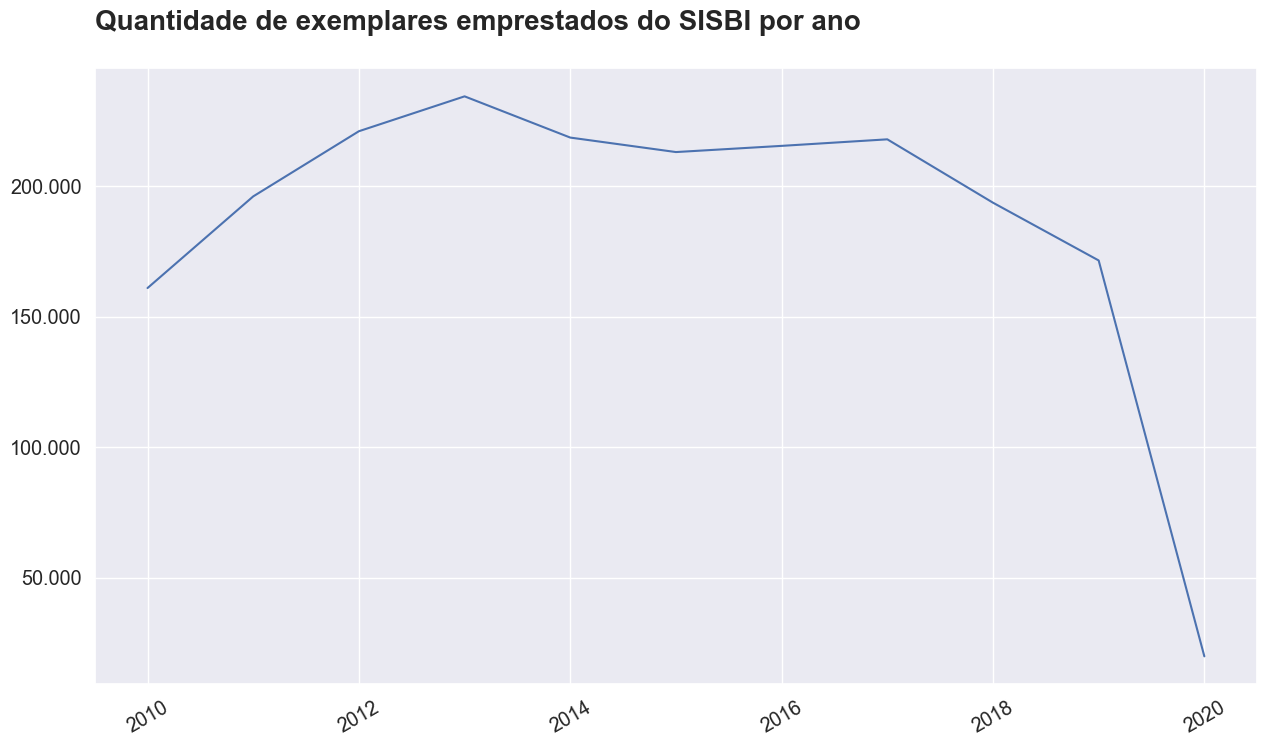

In [27]:
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='deep', 
              font_scale=1.3, 
              rc={"figure.figsize":(15,8)})

ax = sns.lineplot(data=emprestimos_por_ano,x='ano',y='quantidade')
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))   

ax.set_title('Quantidade de exemplares emprestados do SISBI por ano'+'\n',size=20,loc='left',weight='bold')

ax=ax


Podemos observar que a quantidade de exemplares emprestados teve uma crescente até 2013 e, a partir de então, nunca conseguiu atingir o mesmo patamar. Um caminho possível para entender melhor esse situação pode ser, por exemplo, analisar o que houve entre os anos de 2015 e 2017 para que houvesse um pequeno aumento. 

Também é importante avaliar esses dados no contexto em que eles estão inseridos. É possível, por exemplo, que essa dimiuição esteja atrelada com a diminuição de alunos na intituição e não a uma má gestão da biblioteca. Em 2019 o decréscimo expressivo pode ter relação com a pandemia de COVID-19, que restringiu o acesse do público aos espaços de maneira geral.

In [28]:
# verificando os empréstimos por mês

emprestimos_por_mes = emprestimos_data.groupby(by=emprestimos_data.data.dt.month).sum()
emprestimos_por_mes.index.name = 'mes'
emprestimos_por_mes

,quantidade
mes,
1,67240
2,208049
3,247901
4,208441
5,202218
6,137875
7,123561
8,232508
9,207916


In [29]:
# alterando os números pelos nomes dos meses

dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)

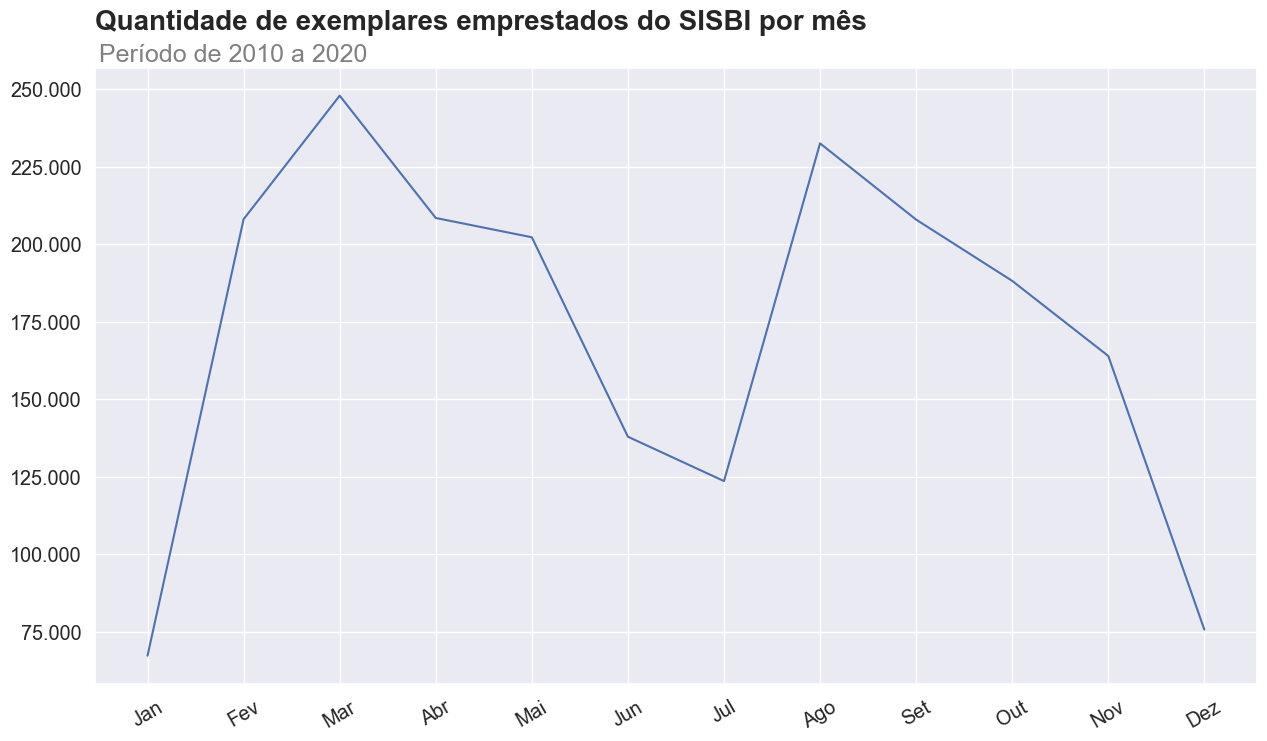

In [30]:
# plotando os empréstimos por mês

ax = sns.lineplot(data=emprestimos_por_mes,x='mes',y='quantidade')
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x',rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))                

ax.set_title("Quantidade de exemplares emprestados do SISBI por mês"+"\n",size=20,loc='left',weight='bold')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=259000,fontsize=18, ha='left',color='gray')

ax=ax
     

Podemos observar que os meses com maior volume de empréstimos são aqueles no meio dos períodos letivos, com pico em março e agosto. Isso já é um resultado esperado por se tratar de uma biblioteca universitária. Os meses com menor demanda (janeiro e dezembro) podem ser boas escolhas para realizar tarefas administrativas, uma vez que o atendimento ao público diminui.

In [31]:
# verificando os horários com maior volume de empréstimos

emprestimos_por_hora = emprestimos_data.groupby(by=emprestimos_data.data.dt.hour).sum()
emprestimos_por_hora.index.name = 'horas'
emprestimos_por_hora = emprestimos_por_hora.reset_index()
emprestimos_por_hora = emprestimos_por_hora.sort_values(ascending=False,by='quantidade')
emprestimos_por_hora

,horas,quantidade
11,16,209718
5,10,185026
12,17,184502
13,18,181746
6,11,179172
10,15,165944
9,14,150202
7,12,148026
4,9,130749
15,20,127219


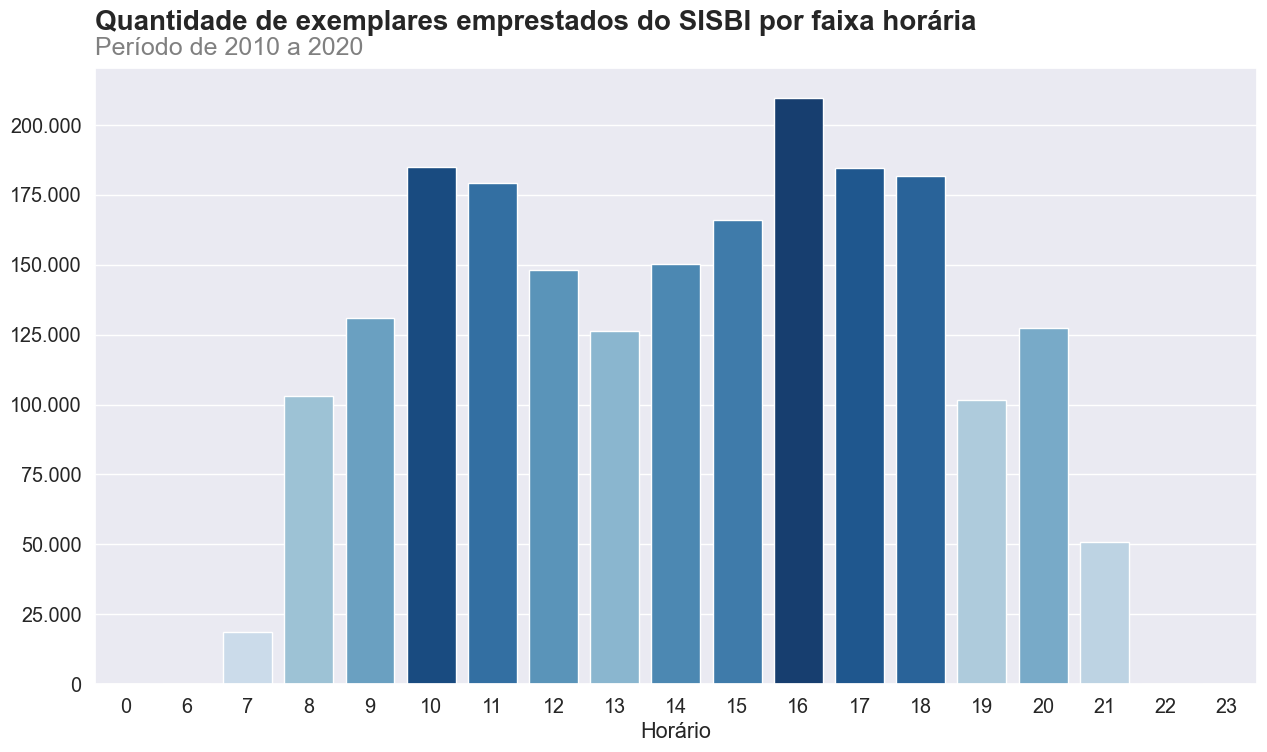

In [32]:
# plotando um gráfico de barras com os horários

import matplotlib.pyplot as plt
ax = sns.barplot(data=emprestimos_por_hora,y='quantidade',x='horas',
                 palette='Blues',hue='quantidade',dodge=False)                  
plt.legend([],[], frameon=False)                                                

ax.set(xlabel='Horário',ylabel=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))           
ax.set_title("Quantidade de exemplares emprestados do SISBI por faixa horária"+"\n",size=20,loc='left',weight='bold')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=225000,fontsize=18, ha='left',color='gray')
ax=ax

Os dois picos de empréstimos são 10 horas da manhã e 4 horas da tarde, então as atividades administrativas devem ficar para os outros horários, mais vazios.

### Verificando os valores de cada variável

In [33]:
# transformando a data para o tipo datetime

df_total['data_emprestimo'] = pd.to_datetime(df_total['data_emprestimo'])     

In [34]:
df_total.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO'], dtype=object)

In [35]:
df_total.colecao.unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [36]:
df_total.biblioteca.unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [37]:
df_total.classe_cdu.unique()

array(['ciencias_aplicadas', 'linguagem_lingua_linguistica',
       'ciencias_sociais', 'geografia_biografia_historia',
       'matematica_ciencias_naturais', 'religiao',
       'generalidades_ciencia_conhecimento', 'filosofia_psicologia',
       'belas_artes'], dtype=object)

### Função para gerar uma tabela de frequência por variável

In [38]:
def tabela_frequencia(variavel):
  dataframe = pd.DataFrame(df_total[variavel].value_counts())                      
  dataframe.columns = ['quantidade']
  dataframe['percentual'] = round((dataframe.quantidade / dataframe.quantidade.sum())*100,1)
  return dataframe

In [39]:
# verificando as estatísticas referentes ao tipo de usuário

tabela_frequencia('tipo_vinculo_usuario')

,quantidade,percentual
ALUNO DE GRADUAÇÃO,1607475,77.9
ALUNO DE PÓS-GRADUAÇÃO,301556,14.6
DOCENTE,70610,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,31930,1.5
ALUNO MÉDIO/TÉCNICO,27916,1.4
DOCENTE EXTERNO,23898,1.2
USUÁRIO EXTERNO,48,0.0


In [40]:
# verificando as estatísticas referentes às coleções

tabela_frequencia('colecao')

,quantidade,percentual
Acervo Circulante,2044049,99.1
Multimeios,7945,0.4
Monografias,4020,0.2
Dissertações,2405,0.1
Obras de Referência,1953,0.1
Publicações de Autores do RN,863,0.0
Publicações da UFRN,762,0.0
Teses,714,0.0
Folhetos,270,0.0
Necessidades Educacionais Específicas,130,0.0


In [41]:
# verificando as estatísticas referentes às bibliotecas

tabela_frequencia('biblioteca')

,quantidade,percentual
Biblioteca Central Zila Mamede,1421282,68.9
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118311,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77401,3.8
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,64661,3.1
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,60895,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,45911,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40516,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32046,1.6
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,28974,1.4
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ - Macaiba,27111,1.3


In [42]:
# verificando as estatísticas referentes às classes CDU

tabela_frequencia('classe_cdu')

,quantidade,percentual
ciencias_aplicadas,1420920,68.9
ciencias_sociais,367576,17.8
matematica_ciencias_naturais,68055,3.3
generalidades_ciencia_conhecimento,62036,3.0
religiao,61746,3.0
filosofia_psicologia,60115,2.9
geografia_biografia_historia,7855,0.4
belas_artes,7774,0.4
linguagem_lingua_linguistica,7356,0.4


### boxplots

In [43]:
# primeiro, vamos analisar os dados dos alunos de graduação

alunos_graduacao = df_total.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
df_total.colecao.value_counts()

Acervo Circulante                        2044049
Multimeios                                  7945
Monografias                                 4020
Dissertações                                2405
Obras de Referência                         1953
Publicações de Autores do RN                 863
Publicações da UFRN                          762
Teses                                        714
Folhetos                                     270
Necessidades Educacionais Específicas        130
Trabalho Acadêmico                           115
Eventos                                      101
Coleção Mossoroense                           44
Coleção Zila Mamede                           30
Literatura de Cordel                          24
Obras Raras                                    8
Name: colecao, dtype: int64

In [44]:
# tabelando os valores mensais por ano da coleção mais utilizada por esse tipo de usuário

alunos_graduacao_acervo_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
alunos_graduacao_acervo_circulante = pd.DataFrame(alunos_graduacao_acervo_circulante)
alunos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_graduacao_acervo_circulante['data_emprestimo'])
alunos_graduacao_acervo_circulante['ano'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_graduacao_acervo_circulante['mes'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2012,3,22796
1,2015,3,22481
2,2013,4,21853
3,2017,3,21734
4,2016,3,21691
...,...,...,...
118,2016,1,2669
119,2019,1,2274
120,2019,12,1980
121,2020,1,1776


In [45]:
# criando uma função para gerar o boxplot com os dados dos tipos de usuários

def gera_box_plot(dataset,x,y,titulo,subtitulo):
  sns.set_theme(style="darkgrid", palette='Blues',font_scale=1.3)                    
  plt.figure(figsize=(16,10))                                                           

  ax = sns.boxplot(y= y, x= x, data= dataset,color='#4171EF')                                           
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))                


  plt.ylim(0,max(dataset[y])*1.1)                                               
  plt.xlabel(None)                                                                     
  plt.ylabel(None)                                                                    

  ax.set_title(titulo+"\n",size=20,loc='left',weight='bold')
  ax.text(s=subtitulo,x=-0.5,y=max(dataset[y])*1.11,fontsize=18, ha='left',color='black')  

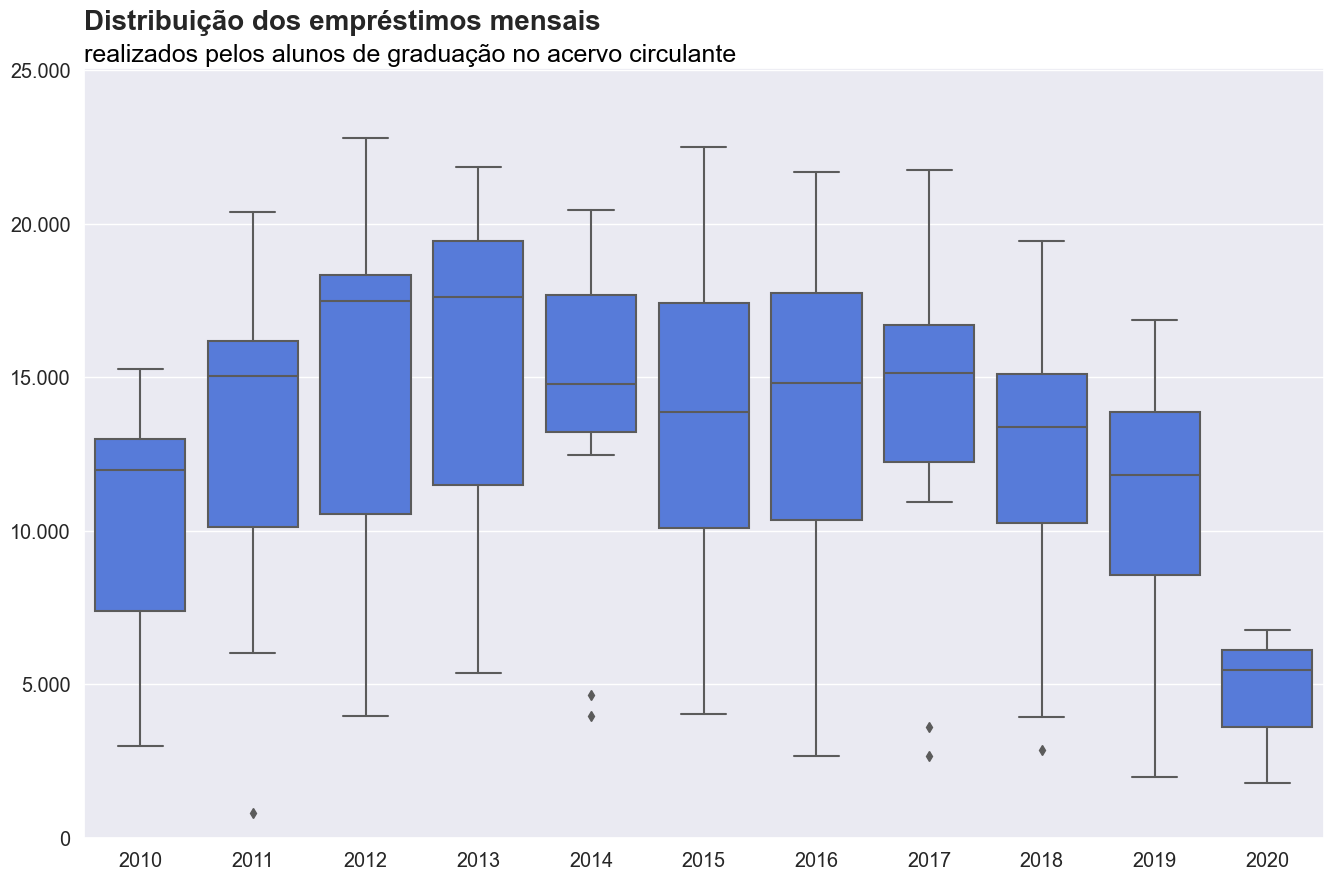

In [46]:
gera_box_plot(alunos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'realizados pelos alunos de graduação no acervo circulante')

In [47]:
# analisando os alunos de pós-graduação

alunos_pos_graduacao = df_total.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao.colecao.value_counts()

Acervo Circulante                        298217
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 277
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: colecao, dtype: int64

In [48]:
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao.query('colecao == "Acervo Circulante"')
alunos_pos_graduacao_acervo_circulante = pd.DataFrame(alunos_pos_graduacao_acervo_circulante)
alunos_pos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_pos_graduacao_acervo_circulante['data_emprestimo'])
alunos_pos_graduacao_acervo_circulante['ano'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_pos_graduacao_acervo_circulante['mes'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_pos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2015,3,3919
1,2017,8,3837
2,2017,3,3721
3,2016,3,3710
4,2016,8,3662
...,...,...,...
119,2019,12,1066
120,2020,3,986
121,2020,2,978
122,2011,1,465


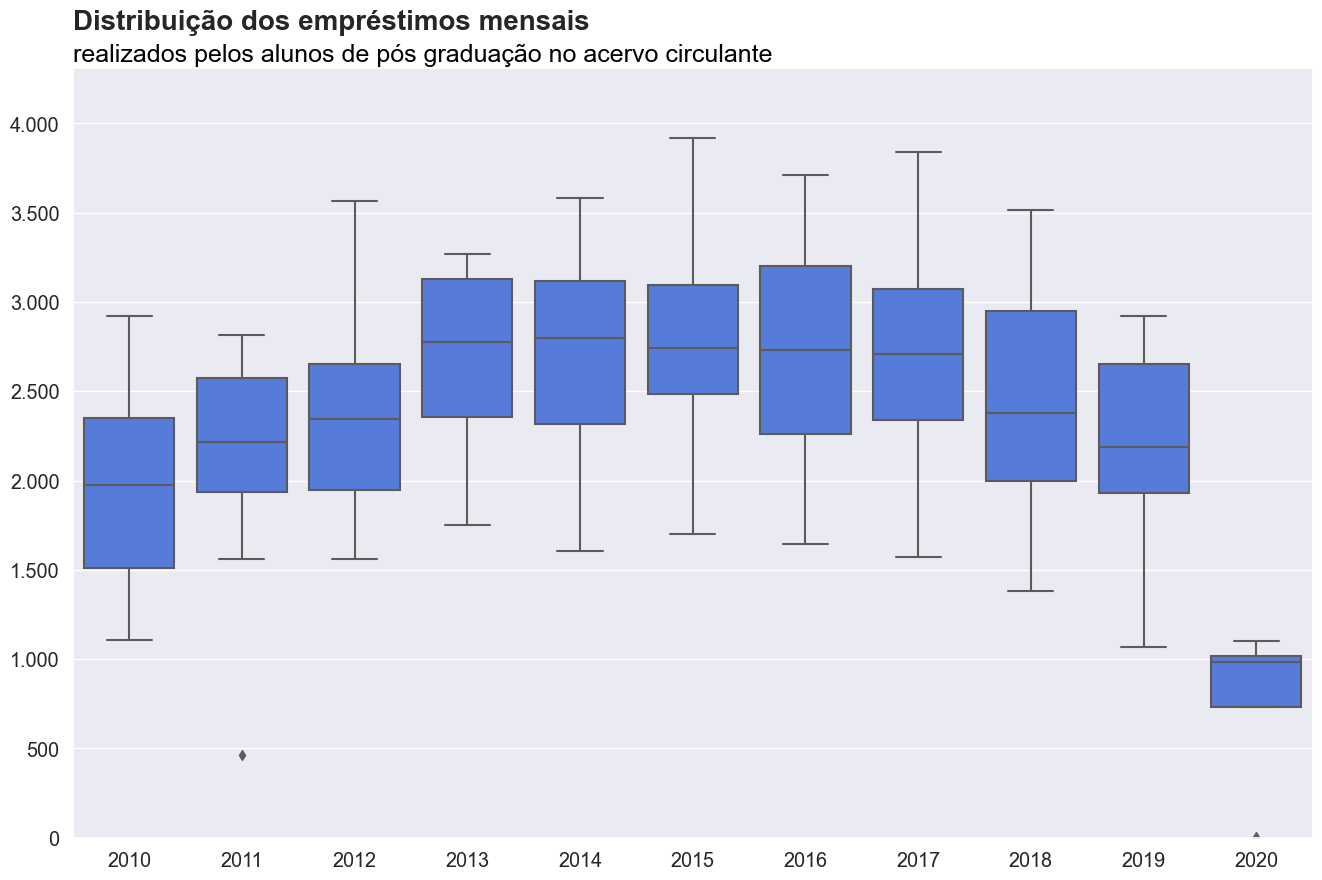

In [49]:
gera_box_plot(alunos_pos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'realizados pelos alunos de pós graduação no acervo circulante')

### Inserindo novos dados

In [50]:
cadastro_usuarios_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Até 2010',skiprows=1)
cadastro_usuarios_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Após 2010',skiprows=1)

In [51]:
cadastro_usuarios_antes_2010.head()

,Número da matrícula,Tipo de vinculo,Curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA


In [52]:
cadastro_usuarios_depois_2010.head()

,Matricula,Tipo de vinculo,Cursos
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA


In [53]:
cadastro_usuarios_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']

In [54]:
cadastro_usuarios_depois_2010.columns= ['matricula_ou_siape','tipo_vinculo_usuario','curso']

In [55]:
cadastro_usuarios_excel = pd.concat([cadastro_usuarios_antes_2010,cadastro_usuarios_depois_2010],ignore_index=True)
cadastro_usuarios_excel.matricula_ou_siape = cadastro_usuarios_excel.matricula_ou_siape.astype('string')
cadastro_usuarios_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [56]:
# transformando os novos dados em um dataframe do pandas

cadastro_usuarios_json = pd.read_json('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json')
cadastro_usuarios_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [57]:
cadastro_usuarios_graduacao_json = pd.read_json(cadastro_usuarios_json.registros[0])

In [58]:
cadastro_usuarios_graduacao_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [59]:
cadastro_usuarios_graduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  int64 
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [60]:
# modificando tipo de dado da matricula
cadastro_usuarios_graduacao_json.matricula_ou_siape = cadastro_usuarios_graduacao_json.matricula_ou_siape.astype('float')
cadastro_usuarios_graduacao_json.matricula_ou_siape = cadastro_usuarios_graduacao_json.matricula_ou_siape.astype('string')

In [61]:
cadastro_usuarios_graduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  string
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: object(2), string(1)
memory usage: 1.4+ MB


In [62]:
# concatenando arquivos Excel e JSON

cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_graduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [63]:
# empréstimos dos alunos de graduação de 2015 em diante

matricula_data_de_emprestimo = df_total.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
matricula_data_de_emprestimo = matricula_data_de_emprestimo.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo = matricula_data_de_emprestimo.query('data_emprestimo > 2015')
matricula_data_de_emprestimo = matricula_data_de_emprestimo.reset_index(drop=True)
matricula_data_de_emprestimo

,matricula_ou_siape,data_emprestimo
0,2014083920.0,2015-02-03 14:56:17.005
1,2014083949.0,2015-03-06 13:16:57.907
2,2014083920.0,2015-04-06 16:58:10.691
3,2014083920.0,2015-05-27 17:39:48.592
4,2014084089.0,2015-07-28 17:46:49.875
...,...,...
783292,2016062643.0,2020-03-17 18:09:29.091
783293,20160144295.0,2020-03-17 18:33:29.752
783294,20150109837.0,2020-03-17 19:49:10.187
783295,20190035012.0,2020-03-17 19:51:15.700


In [64]:
# excluindo valores nulos de matricula
matricula_data_de_emprestimo.isna().sum()

matricula_ou_siape    0
data_emprestimo       0
dtype: int64

In [65]:
# filtrando cursos selecionados

cadastro_usuarios_cursos_selecionados = cadastro_usuarios_cursos.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [66]:
# unindo DataFrames de cadastro de usuários com o de empréstimos

cadastro_usuarios_cursos_selecionados = matricula_data_de_emprestimo.merge(cadastro_usuarios_cursos_selecionados)
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20180009716.0,2019-02-20 16:49:44.354,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
1,20180009716.0,2019-07-22 18:20:33.117,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
2,20180009716.0,2019-09-11 16:33:52.985,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
3,20180009716.0,2018-09-03 07:52:12.383,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
4,20180009716.0,2018-10-31 08:25:35.379,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
...,...,...,...,...
211552,20200007626.0,2020-03-07 13:12:56.894,ALUNO DE GRADUAÇÃO,FILOSOFIA
211553,20200007626.0,2020-03-07 13:12:56.956,ALUNO DE GRADUAÇÃO,FILOSOFIA
211554,20190121101.0,2020-03-13 09:08:44.544,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
211555,20190067212.0,2020-03-13 21:41:01.524,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [67]:
cadastro_usuarios_cursos_selecionados.data_emprestimo = cadastro_usuarios_cursos_selecionados.data_emprestimo.dt.year

In [68]:
emprestimos_cursos_selecionados = cadastro_usuarios_cursos_selecionados.iloc[:,[1,3]].value_counts().reset_index()
emprestimos_cursos_selecionados.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_cursos_selecionados

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,COMUNICAÇÃO SOCIAL,8252
1,2016,COMUNICAÇÃO SOCIAL,7972
2,2017,DIREITO,7882
3,2015,BIBLIOTECONOMIA,7784
4,2015,DIREITO,7665
5,2016,FILOSOFIA,7576
6,2015,CIÊNCIAS SOCIAIS,7489
7,2017,PEDAGOGIA,7434
8,2017,FILOSOFIA,7385
9,2016,DIREITO,7363


In [69]:
matricula_data_de_emprestimo = matricula_data_de_emprestimo.dropna()

In [70]:
# tabela pivotada

emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS',
        fill_value = '-',
        aggfunc= sum,
        margins = True,
        margins_name = 'TOTAL',
)
emprestimos_tipo_usuario_curso_pivot

ANO,2015,2016,2017,2018,2019,2020,TOTAL
CURSO,,,,,,,
BIBLIOTECONOMIA,7784,7042,7307,6378,5889,693,35093
CIÊNCIAS SOCIAIS,7489,6978,6917,6181,5787,619,33971
COMUNICAÇÃO SOCIAL,7147,7972,8252,6952,5884,601,36808
DIREITO,7665,7363,7882,7024,5854,705,36493
FILOSOFIA,6950,7576,7385,6296,5572,626,34405
PEDAGOGIA,7187,7151,7434,6518,5868,629,34787
TOTAL,44222,44082,45177,39349,34854,3873,211557


In [77]:
# alunos de pós-graduação 

cadastro_usuarios_posgraduacao_json = pd.read_json(cadastro_usuarios_json.registros[1])
cadastro_usuarios_posgraduacao_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [78]:
cadastro_usuarios_posgraduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  int64 
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.8+ KB


In [79]:
# alterando tipo de dado matrícula

cadastro_usuarios_posgraduacao_json.matricula_ou_siape = cadastro_usuarios_posgraduacao_json.matricula_ou_siape.astype('float')
cadastro_usuarios_posgraduacao_json.matricula_ou_siape = cadastro_usuarios_posgraduacao_json.matricula_ou_siape.astype('string')

In [80]:
# concatenando excel e json

cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_posgraduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
29435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
29436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
29437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
29438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [81]:
cadastro_usuarios_cursos_pos_graduacao = cadastro_usuarios_posgraduacao_json.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")
cadastro_usuarios_cursos_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [83]:
cadastro_usuarios_posgraduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  string
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: object(2), string(1)
memory usage: 455.8+ KB


In [84]:
# concatenando Excel e JSON

cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_posgraduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
29435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
29436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
29437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
29438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [85]:
cadastro_usuarios_cursos_pos_graduacao = cadastro_usuarios_posgraduacao_json.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")
cadastro_usuarios_cursos_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [86]:
# aplicando filtro de data (2017)

matricula_data_de_emprestimo_pos_graduacao = df_total.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.query('data_emprestimo > 2017')
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.reset_index(drop=True)
matricula_data_de_emprestimo_pos_graduacao

,matricula_ou_siape,data_emprestimo
0,2013043297.0,2017-02-16 16:39:45.480
1,20171029059.0,2017-03-28 09:04:09.781
2,2013043297.0,2017-04-24 20:01:50.300
3,2016008166.0,2017-06-19 19:59:41.522
4,20170083498.0,2017-07-24 08:40:48.277
...,...,...
603180,20160144295.0,2020-03-17 18:33:29.752
603181,20150109837.0,2020-03-17 19:49:10.187
603182,20190035012.0,2020-03-17 19:51:15.700
603183,20191021693.0,2020-03-17 20:00:11.416


In [87]:
# unindo cadastrod e usuários e empréstimo

emprestimos_pos_graduacao_desde_2017 = matricula_data_de_emprestimo_pos_graduacao.merge(cadastro_usuarios_cursos_pos_graduacao)
emprestimos_pos_graduacao_desde_2017

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20171029059.0,2017-03-28 09:04:09.781,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20171029059.0,2017-05-09 15:07:27.165,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20171029059.0,2017-06-12 08:37:05.048,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20171029059.0,2018-03-19 10:10:03.552,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20171029059.0,2018-08-24 19:36:53.956,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
...,...,...,...,...
91247,20182007677.0,2020-01-28 17:31:04.913,ALUNO DE PÓS-GRADUAÇÃO,DESIGN
91248,20191016076.0,2020-02-18 08:44:29.305,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
91249,20182013594.0,2020-02-29 12:40:05.070,ALUNO DE PÓS-GRADUAÇÃO,DESIGN
91250,20191020927.0,2020-03-03 13:46:51.971,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS


In [88]:
# alterando tipo do dado

emprestimos_pos_graduacao_desde_2017.data_emprestimo = emprestimos_pos_graduacao_desde_2017.data_emprestimo.dt.year

In [89]:
# contabilizando valores de empréstimos

emprestimos_pos_graduacao_desde_2017 = emprestimos_pos_graduacao_desde_2017.iloc[:,[1,3]].value_counts().reset_index()
emprestimos_pos_graduacao_desde_2017.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_pos_graduacao_desde_2017.head()

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,ADMINISTRAÇÃO,2538
1,2018,CIÊNCIAS ODONTOLÓGICAS,2534
2,2017,ENGENHARIA DE SOFTWARE,2475
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415


In [90]:
# pivotando tabela

emprestimos_pos_graduacao_e_curso_pivot = emprestimos_pos_graduacao_desde_2017.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS'
)
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2538,2316,1692,222
ARQUITETURA E URBANISMO,2203,1917,1817,194
ARTES CÊNICAS,2112,2081,1811,194
BIOINFORMÁTICA,2190,1913,1824,215
BIOQUÍMICA,2284,1944,2053,210
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,258
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2025,229
CIÊNCIAS DA SAÚDE,2434,1982,1824,194
CIÊNCIAS ODONTOLÓGICAS,2403,2534,2132,290


In [91]:
# dados de previsão 2022

previsao_2022 = pd.read_table('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao')
previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ',expand=True)
previsao_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [92]:
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2538,2316,1692,222
ARQUITETURA E URBANISMO,2203,1917,1817,194
ARTES CÊNICAS,2112,2081,1811,194
BIOINFORMÁTICA,2190,1913,1824,215
BIOQUÍMICA,2284,1944,2053,210
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,258
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2025,229
CIÊNCIAS DA SAÚDE,2434,1982,1824,194
CIÊNCIAS ODONTOLÓGICAS,2403,2534,2132,290


In [93]:
# concatenando as tabelas

previsao_2022.index = emprestimos_pos_graduacao_e_curso_pivot.index
emprestimos_pos_graduacao_e_curso_pivot['2022'] = previsao_2022.iloc[:,1]
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,2538,2316,1692,222,1905
ARQUITETURA E URBANISMO,2203,1917,1817,194,1896
ARTES CÊNICAS,2112,2081,1811,194,1920
BIOINFORMÁTICA,2190,1913,1824,215,2302
BIOQUÍMICA,2284,1944,2053,210,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,258,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2025,229,1960
CIÊNCIAS DA SAÚDE,2434,1982,1824,194,1730
CIÊNCIAS ODONTOLÓGICAS,2403,2534,2132,290,2405


In [94]:
# alterando o tipo

emprestimos_pos_graduacao_e_curso_pivot['2022'] = emprestimos_pos_graduacao_e_curso_pivot['2022'].astype('int')

In [96]:
# criando uma função que calcule a diferença entre os anos

def diferenca_percentual_ano_anterior(x,y):
  return round(((x / y * 100) - 100),2)

In [98]:
# calculando a diferença e adicionando em um dataframe

percentual_2018 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,0])
percentual_2019 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1])
percentual_2022 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,3],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2])

percentual = pd.DataFrame({'2018':percentual_2018,
                           '2019':percentual_2019,
                           '2022':percentual_2022})
percentual

,2018,2019,2022
CURSO,,,
ADMINISTRAÇÃO,-8.75,-26.94,-86.88
ARQUITETURA E URBANISMO,-12.98,-5.22,-89.32
ARTES CÊNICAS,-1.47,-12.97,-89.29
BIOINFORMÁTICA,-12.65,-4.65,-88.21
BIOQUÍMICA,-14.89,5.61,-89.77
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,-87.15
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.38,-88.69
CIÊNCIAS DA SAÚDE,-18.57,-7.97,-89.36
CIÊNCIAS ODONTOLÓGICAS,5.45,-15.86,-86.40


In [100]:
# formatando melhor a tabela anterior

percentual.reset_index(inplace=True)
percentual.columns = percentual.columns.str.capitalize()
percentual.Curso = percentual.Curso.str.capitalize()
percentual

,Index,Curso,2018,2019,2022
0,0,Administração,-8.75,-26.94,-86.88
1,1,Arquitetura e urbanismo,-12.98,-5.22,-89.32
2,2,Artes cênicas,-1.47,-12.97,-89.29
3,3,Bioinformática,-12.65,-4.65,-88.21
4,4,Bioquímica,-14.89,5.61,-89.77
5,5,Ciência e engenharia de materiais,-8.89,-4.83,-87.15
6,6,"Ciência, tecnologia e inovação",-2.07,-14.38,-88.69
7,7,Ciências da saúde,-18.57,-7.97,-89.36
8,8,Ciências odontológicas,5.45,-15.86,-86.40
9,9,Design,-19.15,0.11,-88.80
